# CA01: Intro to Machine Learning
1/27/25

In [228]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
#Import House Train data from git-hub
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")

## PART 1: DATA UNDERSTANDING (Exploring)

Data Understanding – Output of this part will be various visualization of the 
variable analysis and finally the
 Data Quality Report that will identify the data problem 
that exist in this dataset.

In [232]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) #
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [234]:
#Our target feature in this case is "SalePrice"

In [238]:
print(df.shape)
#right away, we can tell there are way too many features and we should condense as best as possible

(1460, 81)


In [240]:
# For data quality report we should include that 19 features have null values. We should further investigate.
missing_features = df.isnull().sum()
missing_features = missing_features[missing_features > 0]
print(missing_features)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [242]:
len(missing_features)

19

In [244]:
missing_percentage = (missing_features / len(df)) * 100
missing_percentage

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [329]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [246]:
distinct_values = df.nunique()
data_types = df.dtypes

summary_df = pd.DataFrame({
    'Distinct Values': distinct_values,
    'Data Type': data_types
})

summary_df

#Here I wanted to see how many distinct valued each feature has and investigate them with their various types a bit further...

,Distinct Values,Data Type
Id,1460,int64
MSSubClass,15,int64
MSZoning,5,object
LotFrontage,110,float64
LotArea,1073,int64
Street,2,object
Alley,2,object
LotShape,4,object
LandContour,4,object
Utilities,2,object


In [248]:
#I am very intested in looking at the following features that I hypothesize will have the biggest impact on house price:
#Float64 columns: LotFrontage
#Int64 columns: SalePrice, LotArea, OverallQual, OverallCond, YearBuilt, 1stFlrSF, 2ndFlrSF, GrLivArea, FullBath, HalfBath, TotRmsAbvGrd, Fireplaces, PoolArea, YrSold
#Object columns: Street, Alley, Neighborhood, MSZoning, LotShape, LandContour, Utilities, LotConfig, LandSlope, Condition1, Condition2, BldgType,GarageArea
#HouseStyle, RoofMatl, Foundation, Heating, CentralAir, GarageType, GarageCars, SaleCondition

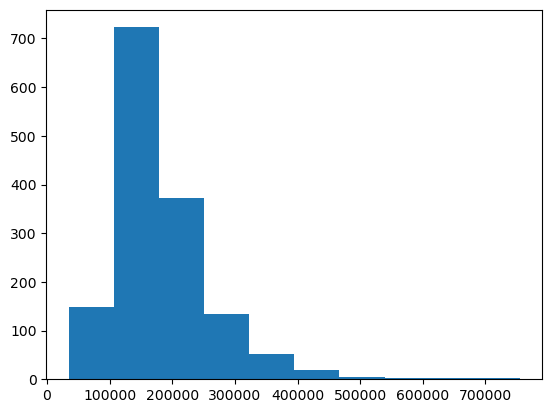

In [250]:
plt.hist(df['SalePrice'])
plt.show()

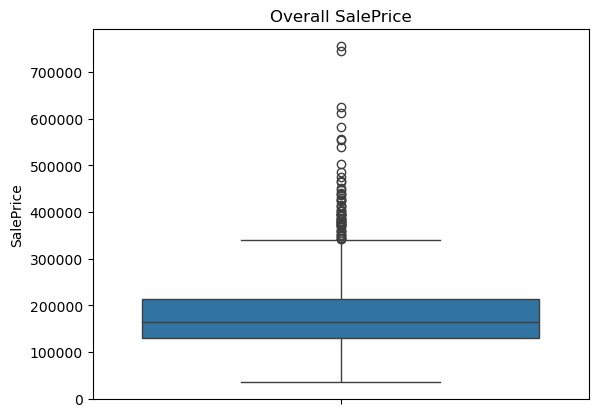

In [136]:
sns.boxplot(y=df['SalePrice'])
plt.title("Overall SalePrice")
plt.show()

In [97]:
print(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


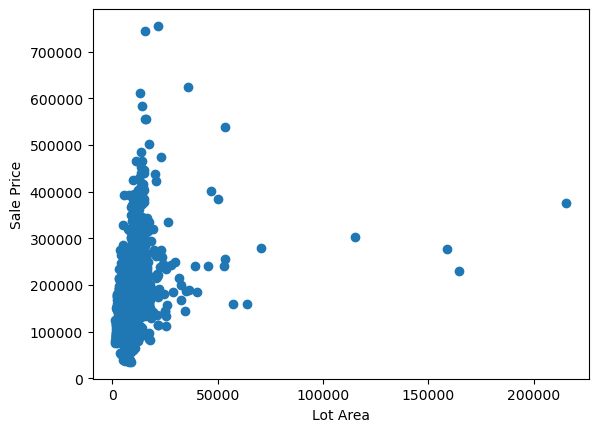

In [103]:
#I want to see how lot area and sale price are correlated:
plt.scatter(df['LotArea'], df['SalePrice'])
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

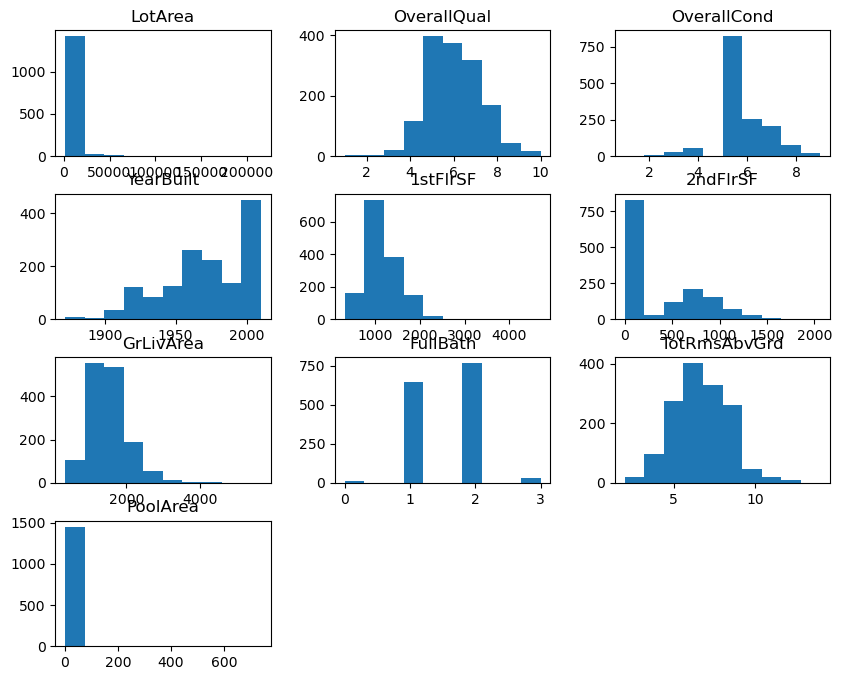

In [174]:
#First, I wanted to take a look at a few of the int64 datatypes

continous_features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'PoolArea']
df[continous_features].hist(bins=10, figsize=(10, 8), grid=False)
plt.show()

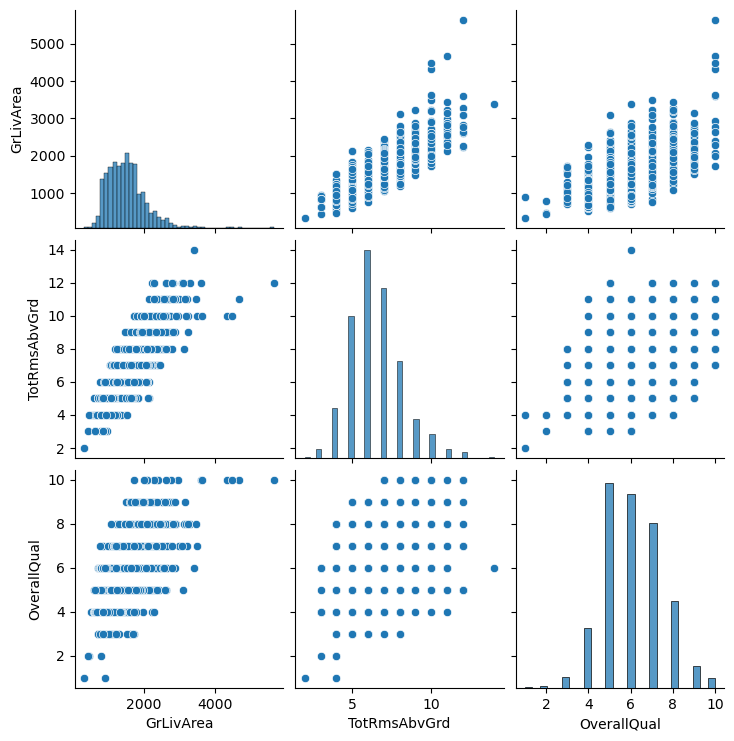

In [212]:
sns.pairplot(df, vars=['GrLivArea', 'TotRmsAbvGrd', 'OverallQual'])
plt.show()

In [180]:
print(df['LotArea'].describe())

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


In [184]:
print(df['SalePrice'].corr(df['TotRmsAbvGrd']))

0.5337231555820284


In [186]:
print(df['SalePrice'].corr(df['OverallQual']))

0.7909816005838048


In [188]:
print(df['SalePrice'].corr(df['1stFlrSF']))

0.6058521846919147


In [190]:
print(df['SalePrice'].corr(df['YearBuilt']))

0.5228973328794969


In [308]:
correlation_quality_condition = df[['OverallQual', 'OverallCond', 'SalePrice']]
correlation_matrix = correlation_quality_condition.corr()
print(correlation_matrix)

             OverallQual  OverallCond  SalePrice
OverallQual     1.000000    -0.091932   0.790982
OverallCond    -0.091932     1.000000  -0.077856
SalePrice       0.790982    -0.077856   1.000000


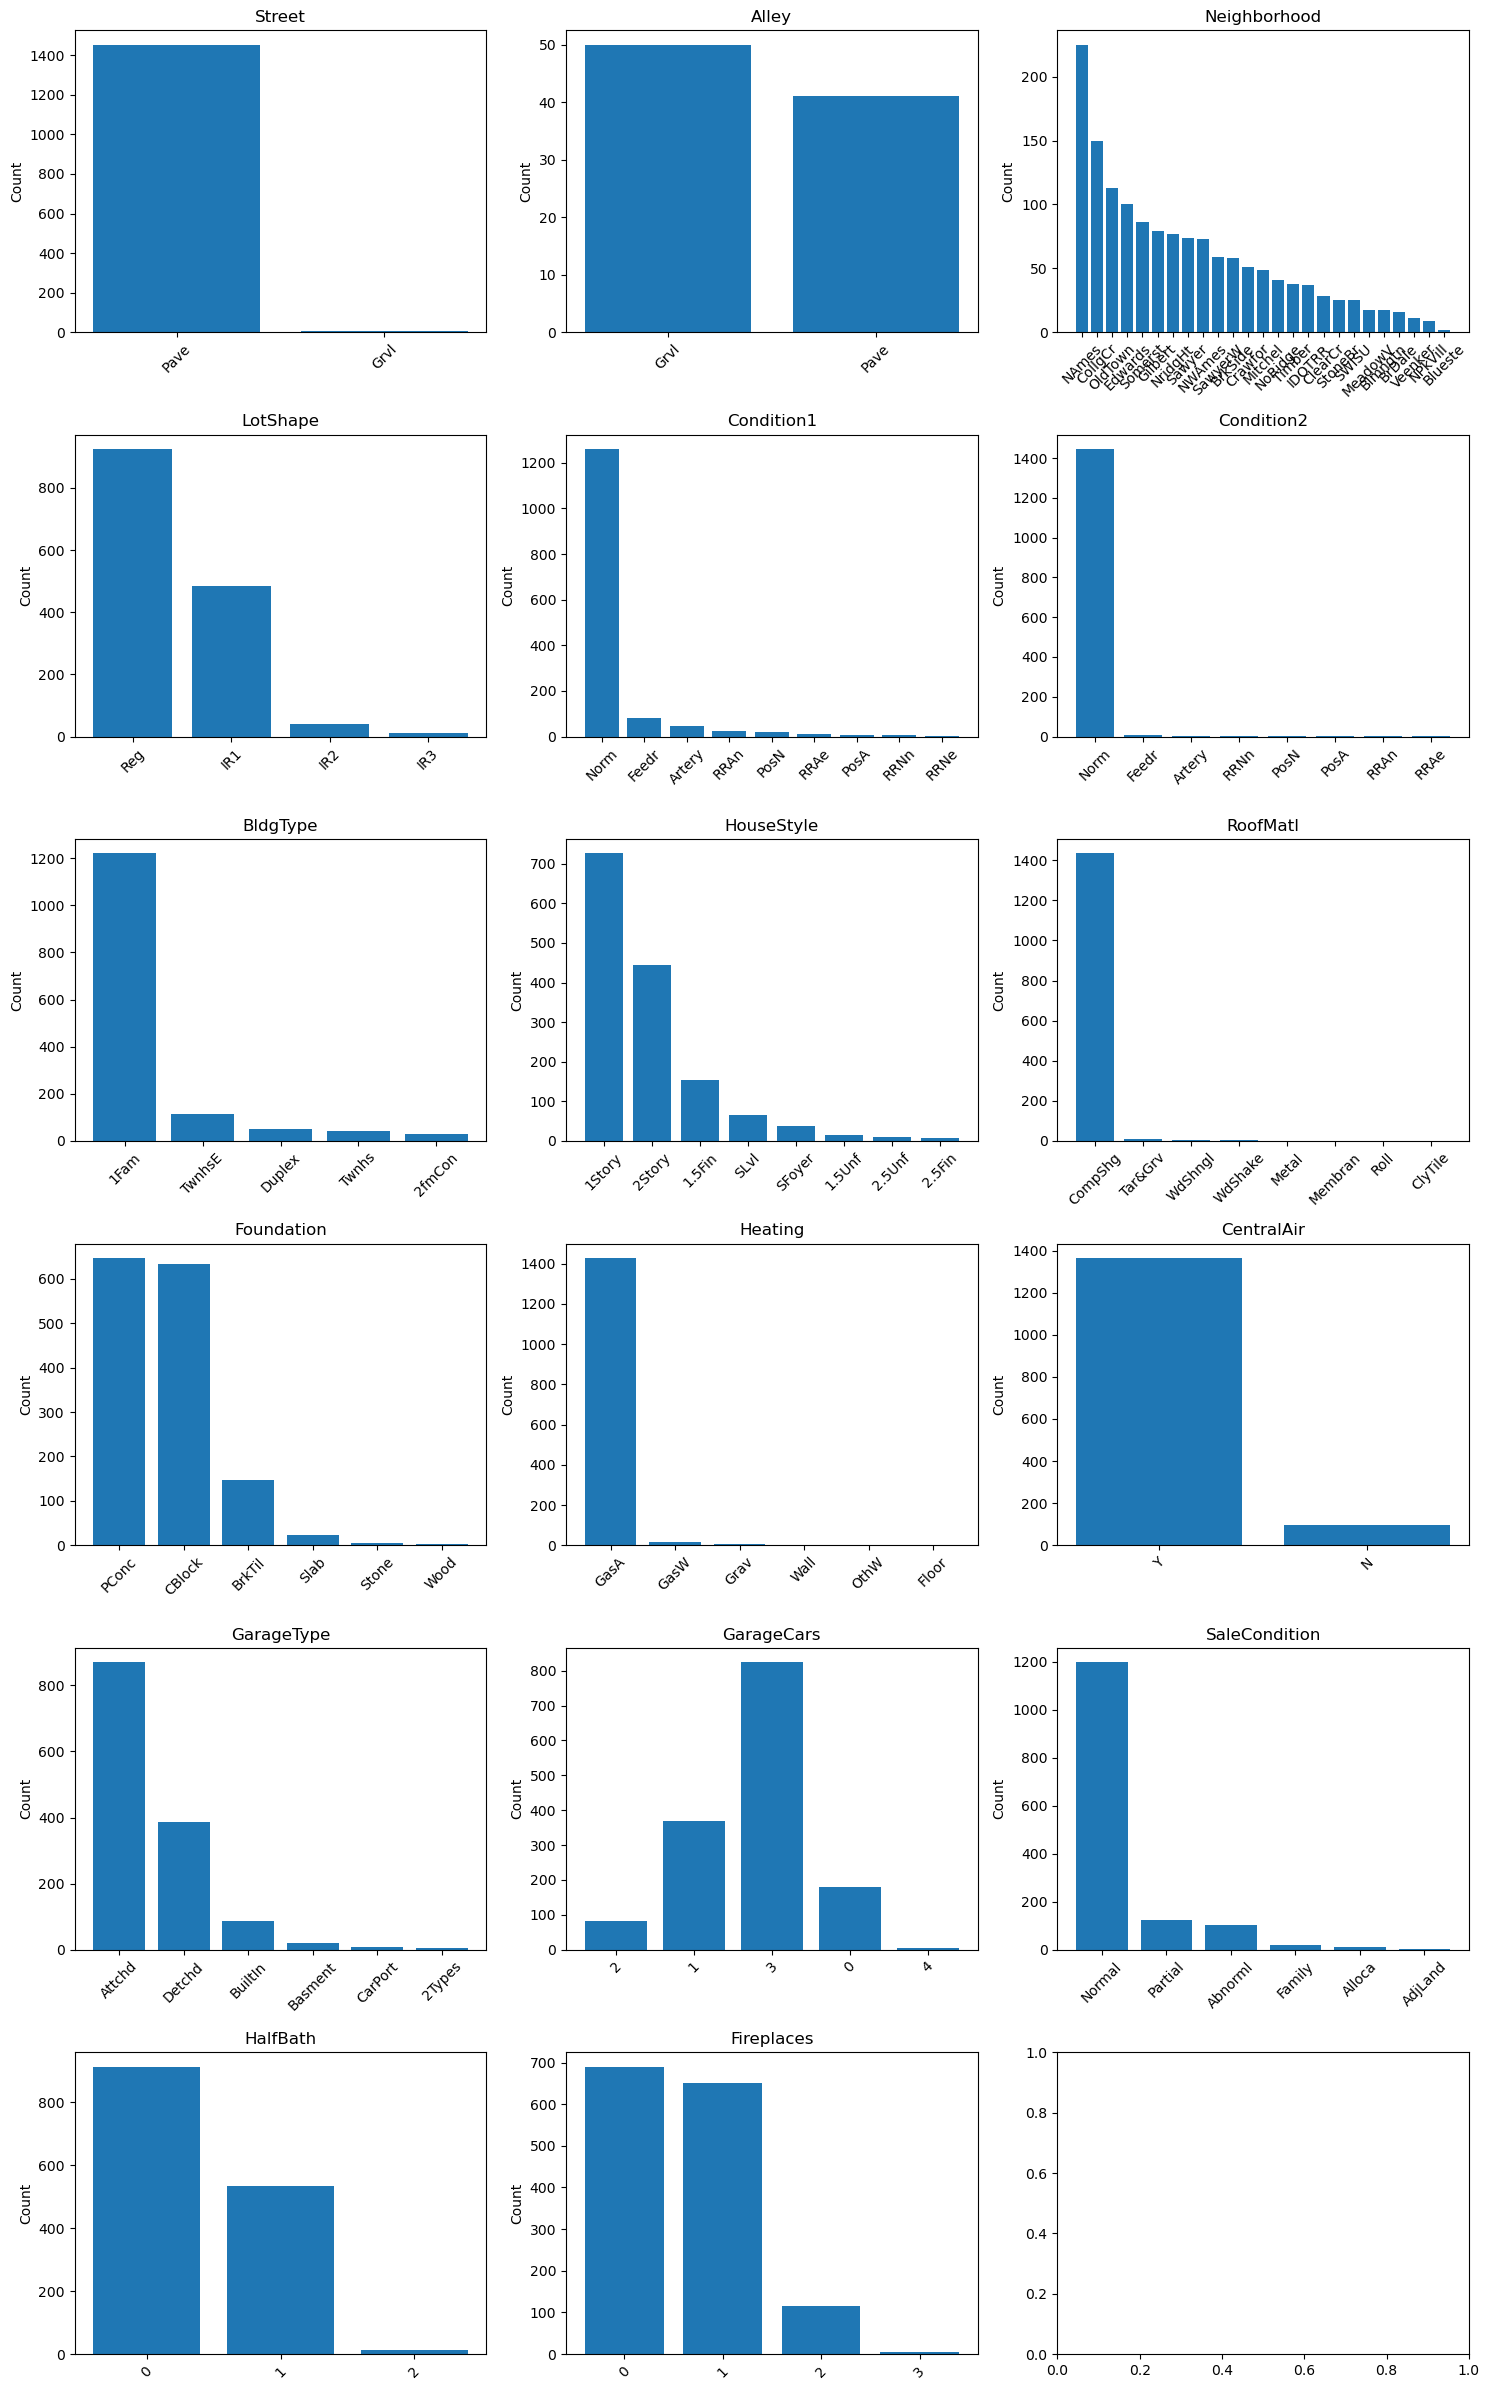

In [178]:
#Now I want to take a closer look at categorical variables I think may be relevant:

categorical_vars = [
    "Street", "Alley", "Neighborhood", "LotShape", "Condition1", "Condition2", 
    "BldgType", "HouseStyle", "RoofMatl", "Foundation", "Heating", 
    "CentralAir", "GarageType", "GarageCars", "SaleCondition", "HalfBath", "Fireplaces"
]

fig, axes = plt.subplots(6, 3, figsize=(15, 24))
axes = axes.flatten() 

for category, var in enumerate(categorical_vars):
    value_counts = df[var].value_counts()
    axes[category].bar(value_counts.index, value_counts.values)
    axes[category].set_title(f"{var}")
    axes[category].set_xticks(range(len(value_counts.index)))
    axes[category].set_xticklabels(value_counts.index, rotation=45)
    axes[category].set_ylabel("Count")

plt.tight_layout()
plt.show()


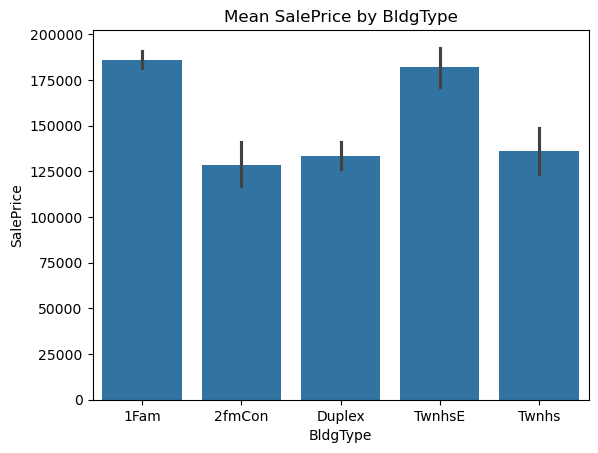

In [270]:
sns.barplot(x='BldgType', y='SalePrice', data=df)
plt.title('Mean SalePrice by BldgType')
plt.show()

In [198]:
grouped_df = df.groupby('Neighborhood')['SalePrice'].mean().round(2).sort_values()
print(grouped_df)

Neighborhood
MeadowV     98576.47
IDOTRR     100123.78
BrDale     104493.75
BrkSide    124834.05
Edwards    128219.70
OldTown    128225.30
Sawyer     136793.14
Blueste    137500.00
SWISU      142591.36
NPkVill    142694.44
NAmes      145847.08
Mitchel    156270.12
SawyerW    186555.80
NWAmes     189050.07
Gilbert    192854.51
Blmngtn    194870.88
CollgCr    197965.77
Crawfor    210624.73
ClearCr    212565.43
Somerst    225379.84
Veenker    238772.73
Timber     242247.45
StoneBr    310499.00
NridgHt    316270.62
NoRidge    335295.32
Name: SalePrice, dtype: float64


In [210]:
pivot_table = df.pivot_table(index='BldgType', columns='Neighborhood', values='SalePrice', aggfunc='mean')
print(pivot_table)

Neighborhood     Blmngtn   Blueste         BrDale        BrkSide  \
BldgType                                                           
1Fam          159895.000       NaN            NaN  124881.696429   
2fmCon               NaN       NaN            NaN  123500.000000   
Duplex               NaN       NaN            NaN            NaN   
Twnhs                NaN  151000.0  102408.333333            NaN   
TwnhsE        197056.875  124000.0  110750.000000            NaN   

Neighborhood        ClearCr        CollgCr        Crawfor        Edwards  \
BldgType                                                                   
1Fam          212565.428571  201858.328571  208719.133333  128402.098765   
2fmCon                  NaN            NaN  157000.000000  110000.000000   
Duplex                  NaN            NaN  145000.000000  127612.500000   
Twnhs                   NaN            NaN            NaN  132500.000000   
TwnhsE                  NaN  143470.000000  300833.333333  140750.0

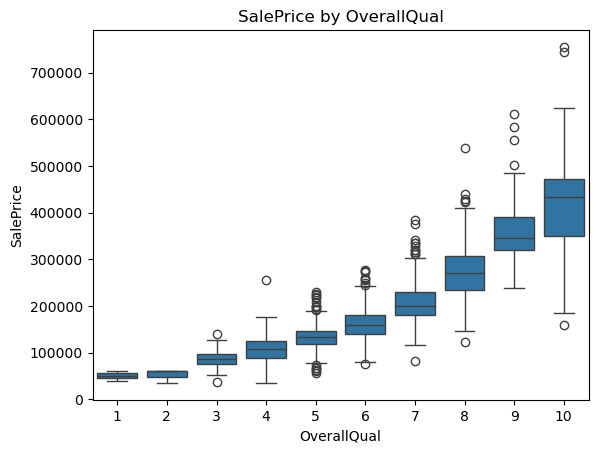

In [113]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("SalePrice by OverallQual")
plt.show()
#This feature has a clear correlation to Sale Price

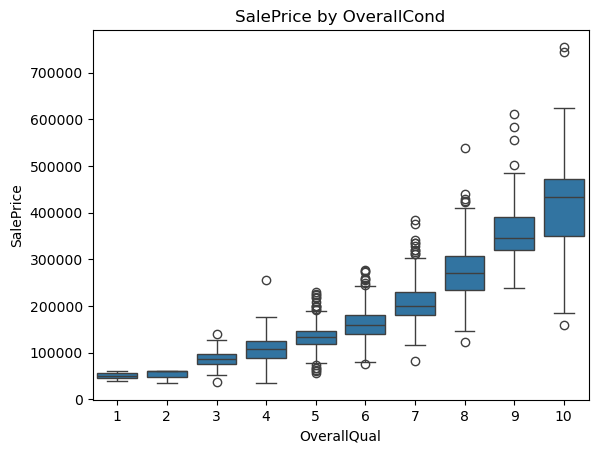

In [117]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("SalePrice by OverallCond")
plt.show()
#This feature also has a clear correlation to Sale Price

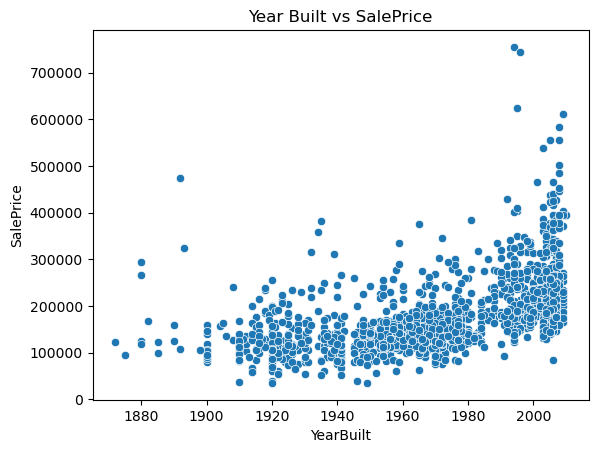

In [121]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.title("Year Built vs SalePrice")
plt.show()

In [290]:
price_neighborhood = df.groupby('Neighborhood')['SalePrice'].agg(['max','mean', 'min']).reset_index().round(0)
price_neighborhood.columns = ['Neighborhood', 'Max_SalePrice', 'Mean_SalePrice','Min_SalePrice']
price_neighborhood_sorted = price_neighborhood.sort_values(by='Mean_SalePrice', ascending=False)
print(price_neighborhood_sorted)

   Neighborhood  Max_SalePrice  Mean_SalePrice  Min_SalePrice
15      NoRidge         755000        335295.0         190000
16      NridgHt         611657        316271.0         154000
22      StoneBr         556581        310499.0         170000
23       Timber         378500        242247.0         137500
24      Veenker         385000        238773.0         162500
21      Somerst         423000        225380.0         144152
4       ClearCr         328000        212565.0         130000
6       Crawfor         392500        210625.0          90350
5       CollgCr         424870        197966.0         110000
0       Blmngtn         264561        194871.0         159895
8       Gilbert         377500        192855.0         141000
14       NWAmes         299800        189050.0          82500
20      SawyerW         320000        186556.0          76000
11      Mitchel         271000        156270.0          84500
12        NAmes         345000        145847.0          87500
13      

In [214]:
#Overall data Quality Report Notes:

#there are 81 features and we should choose fewer
#We should take a look at the percent of missing features and decide if certain columns or rows should be deleted 
#Look into SalePrice outliers 
#LotArea has some clear outliers
#There is honestly a lot more relevant outliers that should be taken a look at 
#Variables highly correlated with one another should be removed (at least one)

#Columns with over 59% missing data will be removed (MasVnrType is 59%)


## PART 2: PRE PROCESSING 
In this part you will fix the data problems identified in the Data Quality Report
learning from python techniques and code samples shared with you (links provided in
the slide deck)

In [385]:
df_preprocessed = df.copy()

In [387]:
#Here I am dropping columns with over 60% values missing. I already established the missing_percentage values earlier
columns_to_drop = missing_percentage[missing_percentage > 59].index
df_cleaned = df_preprocessed.drop(columns=columns_to_drop)

In [389]:
df_cleaned.shape
#5 columns have been deleted

(1460, 76)

In [391]:
missing_percentage_rows = df_cleaned.isnull().mean(axis=1) * 100
rows_to_drop = missing_percentage_rows[missing_percentage_rows > 60].index
df_cleaned = df.drop(index=rows_to_drop)

In [393]:
df_cleaned.shape
#It doesn't look like any rows have over 60% missing inputs

(1460, 81)

In [395]:
df_cleaned.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [397]:
#I want to deal with the rest of the blank data by using imputation (a lot I won't keep):
df_cleaned['LotFrontage'] = df_cleaned['LotFrontage'].fillna(df_cleaned['LotFrontage'].median())
df_cleaned['MasVnrType'] = df_cleaned['MasVnrType'].fillna('None')
df_cleaned['MasVnrArea'] = df_cleaned['MasVnrArea'].fillna(df_cleaned['MasVnrArea'].median())
df_cleaned['BsmtQual'] = df_cleaned['BsmtQual'].fillna('No Basement')
df_cleaned['BsmtCond'] = df_cleaned['BsmtCond'].fillna('No Basement')
df_cleaned['BsmtExposure'] = df_cleaned['BsmtExposure'].fillna('No Basement')
df_cleaned['BsmtFinType1'] = df_cleaned['BsmtFinType1'].fillna('No Basement')
df_cleaned['BsmtFinType2'] = df_cleaned['BsmtFinType2'].fillna('No Basement')
df_cleaned['Electrical'] = df_cleaned['Electrical'].fillna(df_cleaned['Electrical'].mode()[0])
df_cleaned['FireplaceQu'] = df_cleaned['FireplaceQu'].fillna('No Fireplace')
df_cleaned['GarageType'] = df_cleaned['GarageType'].fillna('No Garage')
df_cleaned['GarageYrBlt'] = df_cleaned['GarageYrBlt'].fillna(df_cleaned['GarageYrBlt'].median())
df_cleaned['GarageFinish'] = df_cleaned['GarageFinish'].fillna('No Garage')
df_cleaned['GarageQual'] = df_cleaned['GarageQual'].fillna('No Garage')
df_cleaned['GarageCond'] = df_cleaned['GarageCond'].fillna('No Garage')

In [333]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [331]:
df_cleaned['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [339]:
df_no_missing_value = df_cleaned
df_no_missing_value.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [341]:
print(df_no_missing_value['SalePrice'].skew())
print(df_no_missing_value['SalePrice'].kurtosis())

1.8828757597682129
6.536281860064529


In [343]:
print(df['SalePrice'].corr(df['LotFrontage']))

0.3517990965706781


In [347]:
df_cleaned['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [351]:
df_cleaned['LotShape'].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [353]:
df_cleaned['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [355]:
df_cleaned['LandContour'].value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

In [357]:
df_cleaned['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [363]:
df_cleaned['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [365]:
df_cleaned['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [367]:
df_cleaned['RoofStyle'].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

In [401]:
df_cleaned['Heating'].value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [403]:
df_cleaned['CentralAir'].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [405]:
df_cleaned['Electrical'].value_counts()

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [409]:
df_cleaned['KitchenQual'].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [411]:
df_cleaned['Functional'].value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [413]:
df_cleaned['Fireplaces'].value_counts()

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

In [415]:
df_cleaned['GarageType'].value_counts()

GarageType
Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: count, dtype: int64

In [417]:
df_cleaned['PavedDrive'].value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

In [419]:
df_cleaned['PoolArea'].value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

In [425]:
df_cleaned['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [427]:
df_cleaned['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [435]:
#Now that I have taken care of missing values, I am going to drop features I don't find neccessary to determine house price based 
    #on business understanding along with value counts
features_to_keep = ["LotFrontage","LotArea","LotShape","LandContour", "LotConfig","Neighborhood","BldgType","HouseStyle","OverallQual","OverallCond",
                   "YearBuilt","YearRemodAdd","RoofStyle","RoofMatl","Exterior1st","Foundation","BsmtQual","TotalBsmtSF","1stFlrSF",
                    "2ndFlrSF",	"GrLivArea","FullBath","HalfBath","BedroomAbvGr","KitchenQual","Fireplaces","GarageType","GarageArea", "WoodDeckSF",
                    "OpenPorchSF","EnclosedPorch","ScreenPorch","MoSold","YrSold","SaleCondition","SalePrice"]

df_36_features = df_cleaned[features_to_keep]

#This is 36 features. I feel like I can get it down more.

In [437]:
#Now that I've narrowed my data down significantly, I want to encode categorical variables
pd.set_option('display.max_rows', None)
print(df_36_features.dtypes)

LotFrontage      float64
LotArea            int64
LotShape          object
LandContour       object
LotConfig         object
Neighborhood      object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Foundation        object
BsmtQual          object
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenQual       object
Fireplaces         int64
GarageType        object
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
ScreenPorch        int64
MoSold             int64
YrSold             int64
SaleCondition     object
SalePrice          int64
dtype: object


In [443]:
numeric_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                   'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
                   'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                   'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice']

In [457]:
#Here I am going to standardize my remaining numeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_36_features[numeric_columns] = scaler.fit_transform(df_36_features[numeric_columns])
print(df_36_features.head())

   LotFrontage   LotArea LotShape LandContour LotConfig Neighborhood BldgType  \
0    -0.220875 -0.207142      Reg         Lvl    Inside      CollgCr     1Fam   
1     0.460320 -0.091886      Reg         Lvl       FR2      Veenker     1Fam   
2    -0.084636  0.073480      IR1         Lvl    Inside      CollgCr     1Fam   
3    -0.447940 -0.096897      IR1         Lvl    Corner      Crawfor     1Fam   
4     0.641972  0.375148      IR1         Lvl       FR2      NoRidge     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story     0.651479    -0.517200   1.050994      0.878668     Gable   
1     1Story    -0.071836     2.179628   0.156734     -0.429577     Gable   
2     2Story     0.651479    -0.517200   0.984752      0.830215     Gable   
3     2Story     0.651479    -0.517200  -1.863632     -0.720298     Gable   
4     2Story     1.374795    -0.517200   0.951632      0.733308     Gable   

  RoofMatl Exterior1st Foundation BsmtQual  TotalB

C:\Users\ashle\AppData\Local\Temp\ipykernel_20928\3265468562.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_36_features[numeric_columns] = scaler.fit_transform(df_36_features[numeric_columns])


In [447]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal')
for column in numeric_columns:
    df_36_features[column + '_binned'] = discretizer.fit_transform(df_36_features[[column]])
print(df_36_features.head())

   LotFrontage   LotArea LotShape LandContour LotConfig Neighborhood BldgType  \
0    -0.220875 -0.207142      Reg         Lvl    Inside      CollgCr     1Fam   
1     0.460320 -0.091886      Reg         Lvl       FR2      Veenker     1Fam   
2    -0.084636  0.073480      IR1         Lvl    Inside      CollgCr     1Fam   
3    -0.447940 -0.096897      IR1         Lvl    Corner      Crawfor     1Fam   
4     0.641972  0.375148      IR1         Lvl       FR2      NoRidge     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story     0.651479    -0.517200   1.050994      0.878668     Gable   
1     1Story    -0.071836     2.179628   0.156734     -0.429577     Gable   
2     2Story     0.651479    -0.517200   0.984752      0.830215     Gable   
3     2Story     0.651479    -0.517200  -1.863632     -0.720298     Gable   
4     2Story     1.374795    -0.517200   0.951632      0.733308     Gable   

  RoofMatl Exterior1st Foundation BsmtQual  TotalB

C:\Users\ashle\AppData\Local\Temp\ipykernel_20928\860387761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_36_features[column + '_binned'] = discretizer.fit_transform(df_36_features[[column]])
C:\Users\ashle\AppData\Local\Temp\ipykernel_20928\860387761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_36_features[column + '_binned'] = discretizer.fit_transform(df_36_features[[column]])
C:\Users\ashle\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins who

In [449]:
categorical_columns = pd.get_dummies(df_36_features, columns=['LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
                                                          'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                                                          'Exterior1st', 'Foundation', 'BsmtQual', 'KitchenQual',
                                                          'GarageType', 'SaleCondition'], drop_first=True)

## PART 3: POST PROCESSING

Part 3: For this part, ONLY do the “collinearity” visualization and identification of the
features that needs to be dropped (feature selection), if any. You DO NOT NEED to do
the “class imbalance” step, as this has not been covered yet in class

In [455]:
corr_matrix = df_36_features.corr()
print(corr_matrix)

ValueError: could not convert string to float: 'Reg'